Dennis Piliptchak

Originally generated with ChatGPT 3.5 with the following prompt:

This sentiment analysis exercise will allow you to use PyTorch.
1. Import the required libraries.
2. Load the dataset containing a set of 1,000 product reviews from Amazon, which are
paired with a label of 0 (for negative reviews) or 1 (for positive reviews). Get the data at
https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences.
3. Separate the data into two variables: one containing the reviews and the other containing
the labels. Remove the punctuation from the reviews.
4. Create a variable containing the vocabulary of the entire set of reviews.
5. Additionally, create a dictionary that maps each word to an integer, where the words will
be the keys and the integers will be the values.
6. Encode the review data by replacing each word in a review for its paired integer.
7. Create a class containing the architecture of the network.
8. Make sure that you include an embedding layer. Initialize the model using 64 embedding
dimensions and 128 neurons for 3 LSTM layers.
9. Define the loss function, an optimization algorithm, and the number of epochs to train for.
For example, you can use binary cross-entropy loss as the loss function, the Adam
optimizer, and train for 10 epochs.
10. Create a for loop that goes through the different epochs and through every single
review individually. For each review, perform a prediction, calculate the loss function, and
update the parameters of the network. Additionally, calculate the accuracy of the network
over that training data.
11. Plot the progress of the loss function and accuracy over time.

It created the neural network framework on its own and I edited parts pertaining to loading the data and getting the vocabulary of all the reviews.

C:\Users\denap\anaconda3\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


Epoch [1/10], Loss: 694.8953, Accuracy: 0.4870
Epoch [2/10], Loss: 694.0340, Accuracy: 0.4730
Epoch [3/10], Loss: 693.7509, Accuracy: 0.4740
Epoch [4/10], Loss: 693.6198, Accuracy: 0.4680
Epoch [5/10], Loss: 693.5624, Accuracy: 0.4670
Epoch [6/10], Loss: 693.5355, Accuracy: 0.4740
Epoch [7/10], Loss: 693.5250, Accuracy: 0.4680
Epoch [8/10], Loss: 693.5148, Accuracy: 0.4700
Epoch [9/10], Loss: 693.5019, Accuracy: 0.4700
Epoch [10/10], Loss: 693.5039, Accuracy: 0.4710


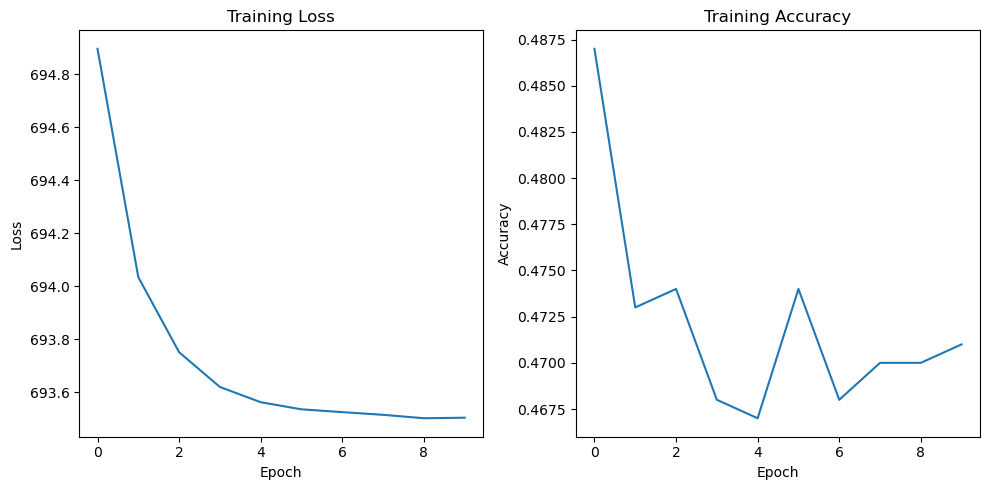

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import string
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import requests
from zipfile import ZipFile
from io import BytesIO
import os
import re

# Step 1: Import required libraries

# Step 2: Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip"
response = requests.get(url)
with ZipFile(BytesIO(response.content), 'r') as zip_ref:
    zip_ref.extractall("data")

file_path = os.path.join("data", "sentiment labelled sentences", "amazon_cells_labelled.txt")
data = []
labels = []
with open(file_path, 'r') as file:
    for line in file:
        line = line.strip().split('\t')
        data.append(line[0])
        labels.append(int(line[1]))

# Step 3: Remove punctuation and separate data
translator = str.maketrans('', '', string.punctuation)
data = [review.translate(translator) for review in data]

# Step 4: Create vocabulary
vectorizer = CountVectorizer()
vectorizer.fit(data)
vocab = vectorizer.vocabulary_

# Step 5: Create word-to-index dictionary
word_to_index = {word: idx for word, idx in enumerate(vocab)}

# Step 6: Encode review data
encoded_data = [[word_to_index.get(word.lower(), 0) for word in review.split()] for review in data]

# Step 7: Define the network architecture
class SentimentClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers):
        super(SentimentClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        out = self.fc(lstm_out[:, -1, :])
        out = self.sigmoid(out)
        return out.squeeze()

# Step 8: Initialize the model
vocab_size = len(vocab)
embedding_dim = 64
hidden_dim = 128
num_layers = 3
model = SentimentClassifier(vocab_size, embedding_dim, hidden_dim, num_layers)

# Step 9: Define loss function, optimizer, and number of epochs
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())
epochs = 10

# Step 10: Training loop
losses = []
accuracies = []

for epoch in range(epochs):
    epoch_loss = 0
    correct = 0
    total = 0
    for review, label in zip(encoded_data, labels):
        review_tensor = torch.tensor(review, dtype=torch.long)
        label_tensor = torch.tensor(label, dtype=torch.float32)

        optimizer.zero_grad()

        output = model(review_tensor.unsqueeze(0))
        loss = criterion(output, label_tensor)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

        predicted = 1 if output.item() > 0.5 else 0
        correct += (predicted == label)
        total += 1

    accuracy = correct / total
    losses.append(epoch_loss)
    accuracies.append(accuracy)
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.4f}')

# Step 11: Plot the progress
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


Generated from ChatGPT 3.5 using the following prompt:

Here is another sentiment analysis exercise:
Consider the following text:
sentence = “””The larger Broncos will be available with 35-inch off-road tires and will be able
to drive through water nearly 3 feet, 10 inches deep. It has independent front suspension, unlike its main competitor, the Jeep Wrangler. Independent suspension, used on almost all modern passenger vehicles, generally provides a smoother ride and better on - road handling than a single solid axle. It still has a solid axle in the back though, like most pickup trucks, a design suited to hard use. Like the Wrangler, both the two- and four-door Bronco will have a removable roofs and doors. Buyers will be able to choose either a hard roof that can be removed in sections, a cloth top, or both. Unlike the Wrangler, though, the Bronco's doors will fit inside the vehicle after being removed. The Bronco will be available with a choice of either a 10-speed automatic or seven-speed manual transmission. (The manual transmission will have six gears for ordinary driving, plus a seventh for low speed off-road driving.) It will be powered by either a 270- horsepower 2.3-liter turbocharged 4- cylinder engine or a 310-horsepower 2.7-liter turbocharged V6. While all of the new Bronco SUVs are designed for hard off-road use, the Bronco Sport isn't quite as hard-core in its capabilities. It also has more convenience features than the more truck-like Bronco. While it's based on engineering that's similar to car-like crossover SUVs, Ford says that it's still intended for serious off-road use. Ford engineers boasted of the off-road testing the prototypes have been put through, including driving through deep sand, up steep inclines, and crawling across boulder-strewn trails.”””

Perform the following tasks:
1. Replace special characters with empty spaces. You can use regex or any other method
2. Remove multiple empty spaces and replace them with a single space
3. Remove any single character
4. Convert the text to all lowercase
5. Split the text into individual words
6. Remove stopwords
7. Tokenize, stem, and lemmatize the text
6. Find the overall sentiment and subjectivity of the text

Regex, stemming, and lemmatization was performed by the AI, and I had to edit how stop words were removed.

In [16]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# Step 1: Replace special characters with empty spaces
sentence = """The larger Broncos will be available with 35-inch off-road tires and will be able to drive through water nearly 3 feet, 10 inches deep. It has independent front suspension, unlike its main competitor, the Jeep Wrangler. Independent suspension, used on almost all modern passenger vehicles, generally provides a smoother ride and better on-road handling than a single solid axle. It still has a solid axle in the back though, like most pickup trucks, a design suited to hard use. Like the Wrangler, both the two- and four-door Bronco will have a removable roofs and doors. Buyers will be able to choose either a hard roof that can be removed in sections, a cloth top, or both. Unlike the Wrangler, though, the Bronco's doors will fit inside the vehicle after being removed. The Bronco will be available with a choice of either a 10-speed automatic or seven-speed manual transmission. (The manual transmission will have six gears for ordinary driving, plus a seventh for low speed off-road driving.) It will be powered by either a 270-horsepower 2.3-liter turbocharged 4-cylinder engine or a 310-horsepower 2.7-liter turbocharged V6. While all of the new Bronco SUVs are designed for hard off-road use, the Bronco Sport isn't quite as hard-core in its capabilities. It also has more convenience features than the more truck-like Bronco. While it's based on engineering that's similar to car-like crossover SUVs, Ford says that it's still intended for serious off-road use. Ford engineers boasted of the off-road testing the prototypes have been put through, including driving through deep sand, up steep inclines, and crawling across boulder-strewn trails."""

# Replace special characters with empty spaces
sentence = re.sub(r'[^a-zA-Z0-9\s]', ' ', sentence)

# Step 2: Remove multiple empty spaces and replace them with a single space
sentence = re.sub(r'\s+', ' ', sentence)

# Step 3: Remove any single character
sentence = re.sub(r'\b\w\b', '', sentence)

# Step 4: Convert the text to all lowercase
sentence = sentence.lower()

# Step 5: Split the text into individual words
words = word_tokenize(sentence)

# Step 6: Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Step 7: Tokenize, stem, and lemmatize the text
porter_stemmer = PorterStemmer()
stemmed_words = [porter_stemmer.stem(word) for word in filtered_words]

wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_words = [wordnet_lemmatizer.lemmatize(word) for word in stemmed_words]

# Step 8: Find the overall sentiment and subjectivity of the text
text_blob = TextBlob(' '.join(lemmatized_words))
sentiment = text_blob.sentiment
print("Overall Sentiment:", sentiment.polarity)
print("Subjectivity:", sentiment.subjectivity)


Overall Sentiment: -0.003349282296650745
Subjectivity: 0.41339712918660293
